In [510]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier 
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import seaborn as sns

In [511]:
data = pd.read_csv('/Users/yenchuchen/Documents/Pythoncode/IBM.csv')

In [512]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [514]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [515]:
# 檢查NA值
na_values = data.isnull().sum()
print("NA值檢查結果：")
print(na_values)

NA值檢查結果：
Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


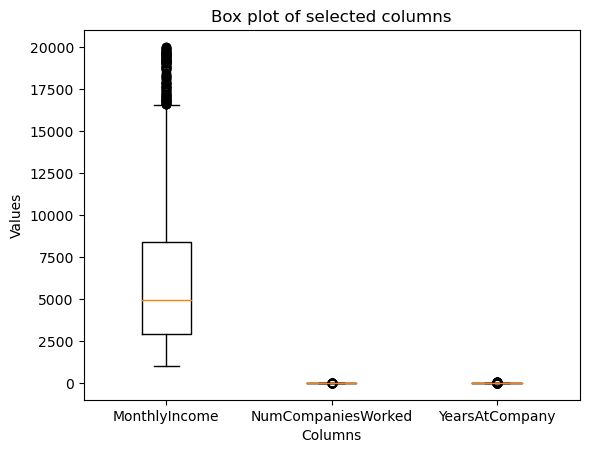

In [516]:
columns_to_plot = ['MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']

plt.boxplot([data[column] for column in columns_to_plot], labels=columns_to_plot)
plt.title("Box plot of selected columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [517]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_check = ['MonthlyIncome','YearsAtCompany']

# 逐列删除离群值
for column in columns_to_check:
    data_remove = remove_outliers_iqr(data, column)

# 打印处理后的DataFrame
print(X_remove.describe())

               Age  DistanceFromHome    Education  EnvironmentSatisfaction  \
count  1366.000000       1366.000000  1366.000000              1366.000000   
mean     36.252562          9.176428     2.912152                 2.725476   
std       8.999140          8.046225     1.020471                 1.091443   
min      18.000000          1.000000     1.000000                 1.000000   
25%      30.000000          2.000000     2.000000                 2.000000   
50%      35.000000          7.000000     3.000000                 3.000000   
75%      42.000000         14.000000     4.000000                 4.000000   
max      60.000000         29.000000     5.000000                 4.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  WorkLifeBalance  \
count      1366.000000    1366.000000         1366.000000      1366.000000   
mean          2.734993    5886.884334            2.724744         2.759883   
std           1.106116    4089.548095            2.495197      

In [518]:
X_remove.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,36.252562,9.176428,2.912152,2.725476,2.734993,5886.884334,2.724744,2.759883,5.751098
std,8.999140,8.046225,1.020471,1.091443,1.106116,4089.548095,2.495197,0.708526,4.021497
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2822.500000,1.000000,2.000000,2.250000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,4701.000000,2.000000,3.000000,5.000000
75%,42.000000,14.000000,4.000000,4.000000,4.000000,6994.250000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19943.000000,9.000000,4.000000,18.000000


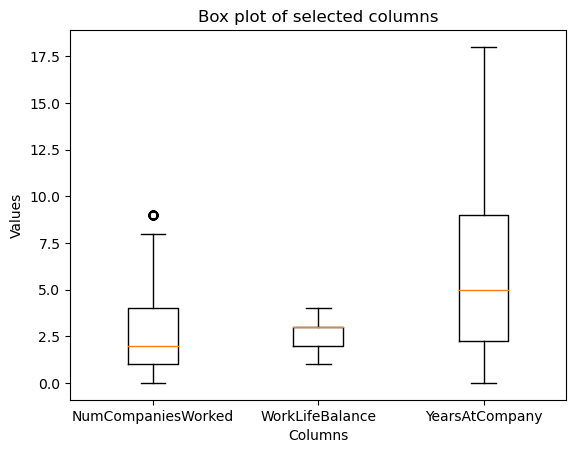

In [519]:
columns_to_plot = ['NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']

plt.boxplot([data_remove[column] for column in columns_to_plot], labels=columns_to_plot)
plt.title("Box plot of selected columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [520]:
X = data_remove.drop('Attrition', axis=1)
X

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [521]:
data_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1366 non-null   int64 
 1   Attrition                1366 non-null   object
 2   Department               1366 non-null   object
 3   DistanceFromHome         1366 non-null   int64 
 4   Education                1366 non-null   int64 
 5   EducationField           1366 non-null   object
 6   EnvironmentSatisfaction  1366 non-null   int64 
 7   JobSatisfaction          1366 non-null   int64 
 8   MaritalStatus            1366 non-null   object
 9   MonthlyIncome            1366 non-null   int64 
 10  NumCompaniesWorked       1366 non-null   int64 
 11  WorkLifeBalance          1366 non-null   int64 
 12  YearsAtCompany           1366 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [522]:
X['Department'].value_counts()

Department
Research & Development    895
Sales                     415
Human Resources            56
Name: count, dtype: int64

In [523]:
X['EducationField'].value_counts()

EducationField
Life Sciences       566
Medical             428
Marketing           145
Technical Degree    125
Other                78
Human Resources      24
Name: count, dtype: int64

In [524]:
X['MaritalStatus'].value_counts()

MaritalStatus
Married     624
Single      441
Divorced    301
Name: count, dtype: int64

In [525]:
y = data_remove["Attrition"]
y.value_counts()

Attrition
No     1139
Yes     227
Name: count, dtype: int64

In [526]:
227/1139

0.199297629499561

In [527]:
one = OneHotEncoder(sparse_output=False) 
imp = SimpleImputer()
scaler = StandardScaler()

In [528]:
X.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

In [529]:
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [530]:
from sklearn.compose import ColumnTransformer

In [531]:
col_transfor = make_column_transformer(
    (one, ["Department"]),
    (one, ["EducationField"]),
    (one, ["MaritalStatus"]),
    (scaler, ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany']),
    remainder="passthrough") #include remaining columns in the output

In [532]:
ct = ColumnTransformer(transformers=[
    ('one_hot_department', one, ["Department"]),
    ('one_hot_educationfield', one, ["EducationField"]),
    ('one_hot_maritalstatus', one, ["MaritalStatus"]),
    ('scaler', scaler, ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany'])
    ], 
    remainder="passthrough")  # 保留其他列

# 设置输出格式为 pandas DataFrame
ct.set_output(transform="pandas")

# 应用列转换器
X_new_df = ct.fit_transform(X_remove)

In [533]:
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   one_hot_department__Department_Human Resources           1366 non-null   float64
 1   one_hot_department__Department_Research & Development    1366 non-null   float64
 2   one_hot_department__Department_Sales                     1366 non-null   float64
 3   one_hot_educationfield__EducationField_Human Resources   1366 non-null   float64
 4   one_hot_educationfield__EducationField_Life Sciences     1366 non-null   float64
 5   one_hot_educationfield__EducationField_Marketing         1366 non-null   float64
 6   one_hot_educationfield__EducationField_Medical           1366 non-null   float64
 7   one_hot_educationfield__EducationField_Other             1366 non-null   float64
 8   one_hot_educationfield__Education

In [534]:
ct2 = ColumnTransformer(transformers=[
    ('one_hot_department', one, ["Department"]),
    ('one_hot_educationfield', one, ["EducationField"]),
    ('one_hot_maritalstatus', one, ["MaritalStatus"]),
    ('scaler', scaler, ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany'])
    ], 
    remainder="passthrough")  # 保留其他列

In [535]:
X_new = ct2.fit_transform(X_remove)

In [536]:
X_new

array([[0., 0., 1., ..., 2., 2., 4.],
       [0., 1., 0., ..., 1., 3., 2.],
       [0., 1., 0., ..., 2., 4., 3.],
       ...,
       [0., 1., 0., ..., 3., 2., 2.],
       [0., 0., 1., ..., 3., 4., 2.],
       [0., 1., 0., ..., 3., 2., 3.]])

In [537]:
X_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1366 non-null   int64 
 1   Department               1366 non-null   object
 2   DistanceFromHome         1366 non-null   int64 
 3   Education                1366 non-null   int64 
 4   EducationField           1366 non-null   object
 5   EnvironmentSatisfaction  1366 non-null   int64 
 6   JobSatisfaction          1366 non-null   int64 
 7   MaritalStatus            1366 non-null   object
 8   MonthlyIncome            1366 non-null   int64 
 9   NumCompaniesWorked       1366 non-null   int64 
 10  WorkLifeBalance          1366 non-null   int64 
 11  YearsAtCompany           1366 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 138.7+ KB


In [538]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

In [539]:
y_train.value_counts()

Attrition
No     784
Yes    172
Name: count, dtype: int64

SMOTE

In [540]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train.shape)
print(y_train.shape)
print(X_train_smote.shape)
print(y_train_smote.value_counts())

(956, 21)
(956,)
(1568, 21)
Attrition
No     784
Yes    784
Name: count, dtype: int64


Logistic Regression

In [541]:
lr = LogisticRegression().fit(X_train_smote, y_train_smote)

In [542]:
y_pred_lr = lr.predict(X_test)

In [543]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[245 110]
 [ 19  36]]


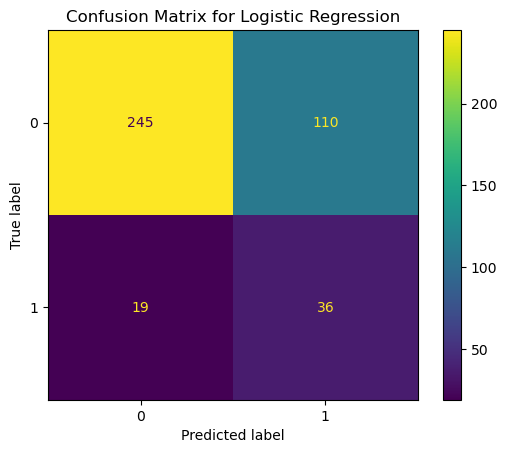

In [544]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
##cm_logreg = confusion_matrix(y_test, y_pred_logreg)  # 逻辑回归模型的预测结果

# 绘制 KNN 混淆矩阵
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_knn.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [545]:
lr_tp = cm_lr[1][1]
lr_fp = cm_lr[0][1]
lr_tn = cm_lr[0][0]
lr_fn= cm_lr[1][0]

In [546]:
accu_lr = (lr_tp + lr_tn)/(lr_tp + lr_tn + lr_fp + lr_fn)

recall_lr = lr_tp/(lr_tp+lr_fn)

precision_lr = lr_tp/(lr_tp+lr_fp)

f_lr = 2*(precision_lr*recall_lr)/(precision_lr+recall_lr)

print("Logistic Regression's accuracy: ", accu_lr)
print("Logistic Regression's Recall: ", recall_lr)
print("Logistic Regression's precision: ", precision_lr)
print("Logistic Regression's F1", f_lr)

Logistic Regression's accuracy:  0.6853658536585366
Logistic Regression's Recall:  0.6545454545454545
Logistic Regression's precision:  0.2465753424657534
Logistic Regression's F1 0.3582089552238806


In [547]:
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_smote, y_train_smote, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.8660378899232402, 0.8883594643148782, 0.8296872448146335, 0.8437203984974685, 0.7971745876204475, 0.8188673852686593, 0.7831536828352116, 0.7997223583210845, 0.7685040013065491, 0.7844398170831293, 0.7602196635636126, 0.7748734280581415, 0.760203331700147, 0.7665850073493385, 0.7506410256410256, 0.7627756001959823, 0.7506573575044913, 0.7595949697860526, 0.7506655234362241, 0.7551363710599379, 0.7423730197615548, 0.741740160052262, 0.7372774783602809, 0.7334517393434591, 0.7289931406173444, 0.7340968479503511, 0.72197860525886, 0.7302792748652621, 0.7213498285154335, 0.716891229789319]


Text(0, 0.5, 'Cross-validated accuracy')

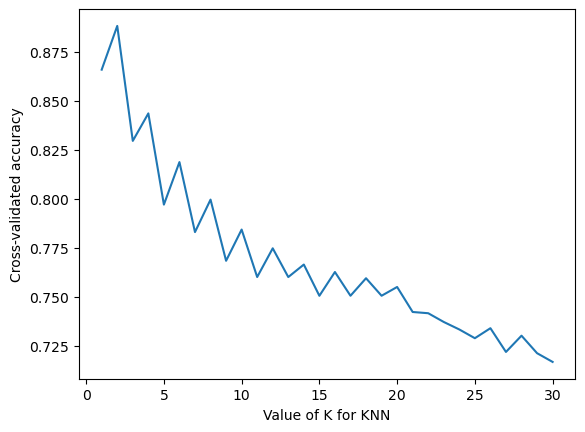

In [548]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-validated accuracy")

In [549]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [550]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [551]:
# view the results
pd.DataFrame(grid.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.866038,0.025206,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.866038,0.025206,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.888359,0.025695,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.866038,0.025206,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.829687,0.028711,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.832239,0.029265,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.843720,0.019868,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.836698,0.027760,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.797175,0.027191,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.805463,0.032436,"{'n_neighbors': 5, 'weights': 'distance'}"


In [552]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8883594643148782
{'n_neighbors': 2, 'weights': 'uniform'}


In [553]:
knn_best = KNeighborsClassifier()
param_grid = {'n_neighbors': 2, 'weights': 'uniform'}
knn_best.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [554]:
y_pred_knn = knn_best.predict(X_test)
print("Accuracy_test:", accuracy_score(y_test, y_pred))
y_p = knn_best.predict(X_train_smote)
print("Accuracy_train:", accuracy_score(y_train_smote, y_p))

Accuracy_test: 0.7975609756097561
Accuracy_train: 0.8603316326530612


In [555]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[237 118]
 [ 20  35]]


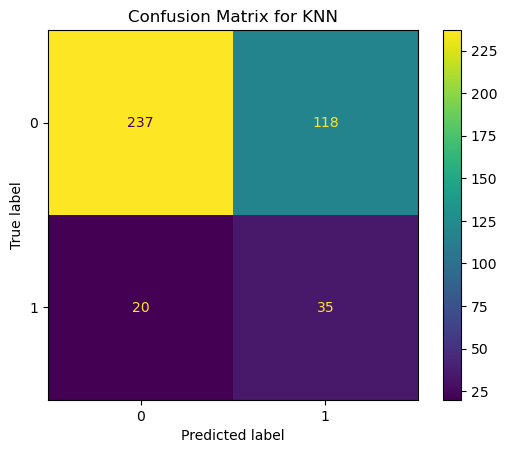

In [556]:
# 绘制 KNN 混淆矩阵
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

In [557]:
kn_tp = cm_knn[1][1]
kn_fp = cm_knn[0][1]
kn_tn = cm_knn[0][0]
kn_fn= cm_knn[1][0]

In [558]:
accu_kn = (kn_tp + kn_tn)/(kn_tp + kn_tn + kn_fp + kn_fn)

recall_kn = kn_tp/(kn_tp+kn_fn)

precision_kn = kn_tp/(kn_tp+kn_fp)

f_kn = 2*(precision_kn*recall_kn)/(precision_kn+recall_kn)

print("knn's accuracy: ", accu_kn)
print("knn's Recall: ", recall_kn)
print("knn's precision: ", precision_kn)
print("knn's F1", f_kn)

knn's accuracy:  0.6634146341463415
knn's Recall:  0.6363636363636364
knn's precision:  0.22875816993464052
knn's F1 0.33653846153846156


Random Forest

In [587]:
rf = RandomForestClassifier(class_weight='balanced')

In [588]:
rf.fit(X_train_smote, y_train_smote)

# Step 2: Predict the test set
y_pred_rf = rf.predict(X_test)

# Step 3: Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.8609756097560975


In [589]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


rf_tp = cm_rf[1][1]
rf_fp = cm_rf[0][1]
rf_tn = cm_rf[0][0]
rf_fn= cm_rf[1][0]

[[340  15]
 [ 42  13]]


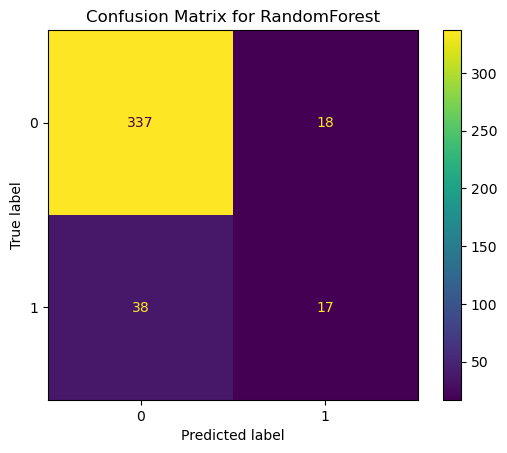

In [562]:
# 绘制 KNN 混淆矩阵
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Confusion Matrix for RandomForest")
plt.show()

In [563]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


rf_tp = cm_rf[1][1]
rf_fp = cm_rf[0][1]
rf_tn = cm_rf[0][0]
rf_fn= cm_rf[1][0]

accu_rf = (rf_tp + rf_tn)/(rf_tp + rf_tn + rf_fp + rf_fn)

recall_rf = rf_tp/(rf_tp+rf_fn)

precision_rf = rf_tp/(rf_tp+rf_fp)

f_rf = 2*(precision_rf*recall_rf)/(precision_rf+recall_rf)

print("random forest's accuracy: ", accu_rf)
print("random forest's  Recall: ", recall_rf)
print("random forest's  precision: ", precision_rf)
print("random forest's  F1", f_rf)

[[337  18]
 [ 38  17]]
random forest's accuracy:  0.8634146341463415
random forest's  Recall:  0.3090909090909091
random forest's  precision:  0.4857142857142857
random forest's  F1 0.3777777777777777


In [564]:
feature_names

Index(['HumanResources Dept.', 'Dept_RD', 'Dept_Sales', 'Edu_HumanResources',
       'Edu_LifeSciences', 'Edu_Marketing', 'Edu_Medical', 'Edu_Other',
       'Edu_TechDegree', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Age', 'Dist_FromHome', 'Monthly_Income',
       'Num_CompaniesWorked', 'WorkLife_Balance', 'Years_AtCompany',
       'Education', 'Env_Satisfaction', 'Job_Satisfaction'],
      dtype='object')

Adaboost

In [565]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm="SAMME.R", random_state=1)

In [566]:
# Perform 5-fold cross_validation and compute the accuracy
acc_ada = cross_val_score(ada, X_train_smote, y_train_smote, cv=5)

In [567]:
print(acc_ada.mean())

0.8387497201929144


In [591]:
ada.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=1,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=None,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=100, random_state=1)

In [592]:
y_pred_ada = ada.predict(X_test)

In [593]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
print(cm_ada)


ada_tp = cm_ada[1][1]
ada_fp = cm_ada[0][1]
ada_tn = cm_ada[0][0]
ada_fn= cm_ada[1][0]

accu_ada = (ada_tp + ada_tn)/(ada_tp + ada_tn + ada_fp + ada_fn)

recall_ada = ada_tp/(ada_tp+ada_fn)

precision_ada = ada_tp/(ada_tp+ada_fp)

f_ada = 2*(precision_ada*recall_ada)/(precision_ada+recall_ada)

print("ada's accuracy: ", accu_ada)
print("ada's  Recall: ", recall_ada)
print("ada's  precision: ", precision_ada)
print("ada's  F1", f_ada)

[[314  41]
 [ 28  27]]
ada's accuracy:  0.8317073170731707
ada's  Recall:  0.4909090909090909
ada's  precision:  0.39705882352941174
ada's  F1 0.43902439024390244


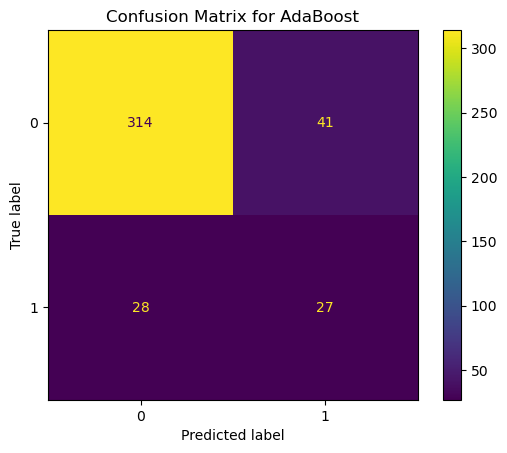

In [571]:
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
disp_ada.plot()
plt.title("Confusion Matrix for AdaBoost")
plt.show()

In [572]:
len(feature_names)

21

knn+decision tree

In [573]:
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(max_depth=1)

# 定義 AdaBoost 模型
adaboost = AdaBoostClassifier(base_estimator=decision_tree)

# 定義投票分類器，將 KNN 和 AdaBoost 結合起來
voting_clf = VotingClassifier(estimators=[('knn', knn), ('adaboost', adaboost)], voting='soft')

# 定義參數網格
param_grid = {
    'knn__n_neighbors': [2],
    'adaboost__n_estimators': [100],
    'adaboost__learning_rate': [0.01, 0.1, 0.5]
}

# 建立並訓練網格搜索
grid = GridSearchCV(voting_clf, param_grid, cv=10, scoring="accuracy")
grid.fit(X_train_smote, y_train_smote)

# 顯示最佳參數和模型
print("Best parameters found: ", grid.best_params_)
best_model = grid.best_estimator_
print("Best model: ", best_model)

/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will b

Best parameters found:  {'adaboost__learning_rate': 0.5, 'adaboost__n_estimators': 100, 'knn__n_neighbors': 2}
Best model:  VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=2,
                                                   p=2, weights='uniform')),
                             ('adaboost',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                       class_weight=None,
                                                                                       

/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [574]:
y_pred_voting = best_model.predict(X_test)

In [575]:
cm_vot = confusion_matrix(y_test, y_pred_voting)
print(cm_vot)


vot_tp = cm_vot[1][1]
vot_fp = cm_vot[0][1]
vot_tn = cm_vot[0][0]
vot_fn= cm_vot[1][0]

accu_vot = (vot_tp + vot_tn)/(vot_tp + vot_tn + vot_fp + vot_fn)

recall_vot = vot_tp/(vot_tp+vot_fn)

precision_vot = vot_tp/(vot_tp+vot_fp)

f_vot = 2*(precision_vot*recall_vot)/(precision_vot+recall_vot)

print("voting's accuracy: ", accu_vot)
print("voting's  Recall: ", recall_vot)
print("voting's  precision: ", precision_vot)
print("voting's  F1", f_vot)

[[281  74]
 [ 23  32]]
voting's accuracy:  0.7634146341463415
voting's  Recall:  0.5818181818181818
voting's  precision:  0.3018867924528302
voting's  F1 0.3975155279503106


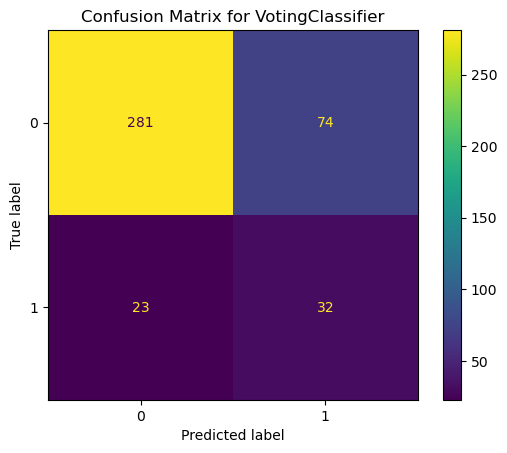

In [576]:
disp_vot = ConfusionMatrixDisplay(confusion_matrix=cm_vot)
disp_vot.plot()
plt.title("Confusion Matrix for VotingClassifier")
plt.show()

In [577]:
kbest = SelectKBest(score_func=f_classif, k=10)  # 选择 k 个最佳特征

# 创建一个包含特征选择和最佳模型的管道
pipeline = Pipeline([
    ('kbest', kbest),
    ('voting', ada)
])

# 使用训练数据训练管道
pipeline.fit(X_train_smote, y_train_smote)

# 使用测试数据进行预测
y_pred_kbest = pipeline.predict(X_test)

cm_kbest = confusion_matrix(y_test, y_pred_kbest)
print(cm_kbest)


kb_tp = cm_kbest[1][1]
kb_fp = cm_kbest[0][1]
kb_tn = cm_kbest[0][0]
kb_fn= cm_kbest[1][0]

accu_kb = (kb_tp + kb_tn)/(kb_tp + kb_tn + kb_fp + kb_fn)

recall_kb = kb_tp/(kb_tp+kb_fn)

precision_kb = kb_tp/(kb_tp+kb_fp)

f_kb = 2*(precision_kb*recall_kb)/(precision_kb+recall_kb)

print("kb's accuracy: ", accu_kb)
print("kb's  Recall: ", recall_kb)
print("kb's  precision: ", precision_kb)
print("kb's  F1", f_kb)

[[306  49]
 [ 31  24]]
kb's accuracy:  0.8048780487804879
kb's  Recall:  0.43636363636363634
kb's  precision:  0.3287671232876712
kb's  F1 0.37500000000000006


PCA

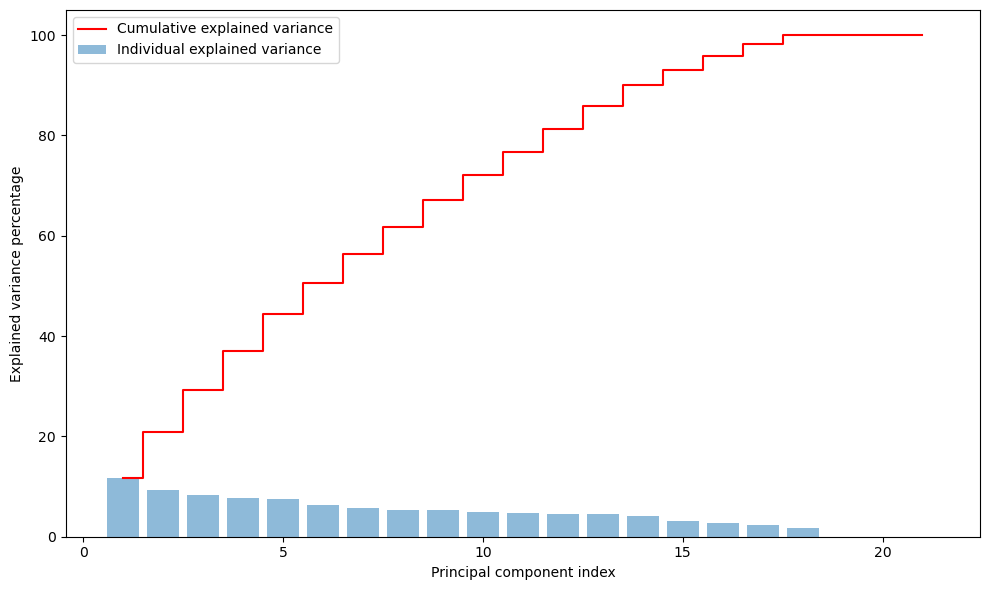

In [578]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# 应用 PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 计算解释方差
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# 画图
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance * 100, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [579]:
cumulative_explained_variance

array([0.11617939, 0.20896089, 0.29309229, 0.36963325, 0.44406221,
       0.50660175, 0.56427309, 0.61823391, 0.67061599, 0.72017361,
       0.76705294, 0.8133424 , 0.85806092, 0.89983299, 0.9312933 ,
       0.95927046, 0.98287687, 1.        , 1.        , 1.        ,
       1.        ])

不做PCA><

ANN

In [580]:
set_config(print_changed_only=False) #print out parameters
mn = MLPClassifier (max_iter=500, activation='relu')

In [581]:
mn.fit(X_train_smote, y_train_smote)

/Users/yenchuchen/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [582]:
y_pred_mn = mn.predict (X_test)
y_pred_mn

array(['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [583]:
cm_mn = confusion_matrix(y_test, y_pred_mn)
print(cm_mn)


mn_tp = cm_mn[1][1]
mn_fp = cm_mn[0][1]
mn_tn = cm_mn[0][0]
mn_fn = cm_mn[1][0]
print(mn_fn)
accu_mn = (mn_tp + mn_tn)/(mn_tp + mn_tn + mn_fp + mn_fn)

recall_mn = mn_tp/(mn_tp+mn_fn)

precision_mn = mn_tp/(mn_tp+mn_fp)

f_mn = 2*(precision_vot*recall_vot)/(precision_vot+recall_vot)

print("ANN's accuracy: ", accu_mn)
print("ANN's  Recall: ", recall_mn)
print("ANN's  precision: ", precision_mn)
print("ANN's  F1", f_mn)

[[305  50]
 [ 35  20]]
35
ANN's accuracy:  0.7926829268292683
ANN's  Recall:  0.36363636363636365
ANN's  precision:  0.2857142857142857
ANN's  F1 0.3975155279503106


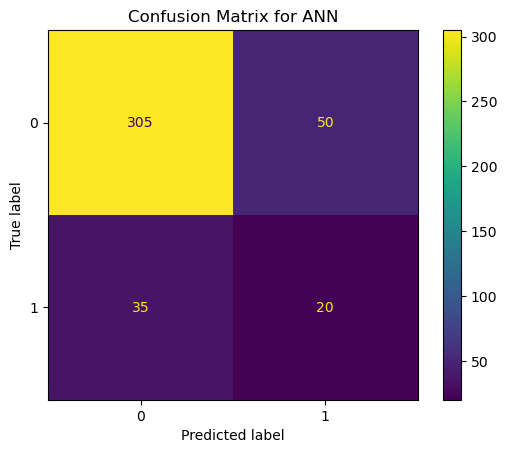

In [584]:
disp_ann = ConfusionMatrixDisplay(confusion_matrix=cm_mn)
disp_ann.plot()
plt.title("Confusion Matrix for ANN")
plt.show()

In [585]:
metrics.accuracy_score(y_test, y_pred)

0.7975609756097561

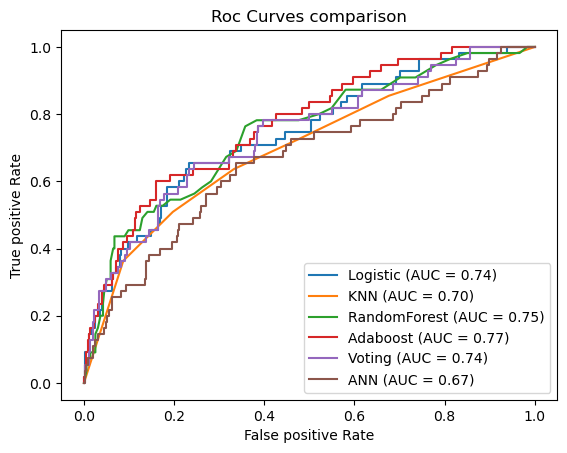

In [594]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, name = "Logistic")
RocCurveDisplay.from_estimator(knn_best, X_test, y_test, ax=ax, name = "KNN")
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name = "RandomForest")
RocCurveDisplay.from_estimator(ada, X_test, y_test, ax=ax, name = "Adaboost")
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax, name = "Voting")
RocCurveDisplay.from_estimator(mn, X_test, y_test, ax=ax, name = "ANN")

plt.title("Roc Curves comparison")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.legend(loc = "best")
plt.show()

In [595]:
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   one_hot_department__Department_Human Resources           1366 non-null   float64
 1   one_hot_department__Department_Research & Development    1366 non-null   float64
 2   one_hot_department__Department_Sales                     1366 non-null   float64
 3   one_hot_educationfield__EducationField_Human Resources   1366 non-null   float64
 4   one_hot_educationfield__EducationField_Life Sciences     1366 non-null   float64
 5   one_hot_educationfield__EducationField_Marketing         1366 non-null   float64
 6   one_hot_educationfield__EducationField_Medical           1366 non-null   float64
 7   one_hot_educationfield__EducationField_Other             1366 non-null   float64
 8   one_hot_educationfield__Education

In [596]:
new_column_names = {
    'one_hot_department__Department_Human Resources': 'Dept_HumanResources',
    'one_hot_department__Department_Research & Development': 'Dept_RD',
    'one_hot_department__Department_Sales': 'Dept_Sales',
    'one_hot_educationfield__EducationField_Human Resources': 'Edu_HumanResources',
    'one_hot_educationfield__EducationField_Life Sciences': 'Edu_LifeSciences',
    'one_hot_educationfield__EducationField_Marketing': 'Edu_Marketing',
    'one_hot_educationfield__EducationField_Medical': 'Edu_Medical',
    'one_hot_educationfield__EducationField_Other': 'Edu_Other',
    'one_hot_educationfield__EducationField_Technical Degree': 'Edu_TechDegree',
    'one_hot_maritalstatus__MaritalStatus_Divorced': 'Marital_Divorced',
    'one_hot_maritalstatus__MaritalStatus_Married': 'Marital_Married',
    'one_hot_maritalstatus__MaritalStatus_Single': 'Marital_Single',
    'scaler__Age': 'Age',
    'scaler__DistanceFromHome': 'Dist_FromHome',
    'scaler__MonthlyIncome': 'Monthly_Income',
    'scaler__NumCompaniesWorked': 'Num_CompaniesWorked',
    'scaler__WorkLifeBalance': 'WorkLife_Balance',
    'scaler__YearsAtCompany': 'Years_AtCompany',
    'remainder__Education': 'Education',
    'remainder__EnvironmentSatisfaction': 'Env_Satisfaction',
    'remainder__JobSatisfaction': 'Job_Satisfaction'
}

# 重命名列
X_new_df = X_new_df.rename(columns=new_column_names)

X_new_df.head()

,Dept_HumanResources,Dept_RD,Dept_Sales,Edu_HumanResources,Edu_LifeSciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_TechDegree,Marital_Divorced,...,Marital_Single,Age,Dist_FromHome,Monthly_Income,Num_CompaniesWorked,WorkLife_Balance,Years_AtCompany,Education,Env_Satisfaction,Job_Satisfaction
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.527737,-1.016554,0.025958,2.114938,-2.484776,0.061916,2,2,4
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.417036,-0.146262,-0.185146,-0.691479,0.339021,1.056934,1,3,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.083087,-0.892227,-0.928776,1.313105,0.339021,-1.430613,2,4,3
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.361563,-0.767899,-0.728436,-0.691479,0.339021,0.559425,4,4,3
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.028537,-0.892227,-0.591696,2.515855,0.339021,-0.933103,1,1,2


In [597]:
X_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dept_HumanResources  1366 non-null   float64
 1   Dept_RD              1366 non-null   float64
 2   Dept_Sales           1366 non-null   float64
 3   Edu_HumanResources   1366 non-null   float64
 4   Edu_LifeSciences     1366 non-null   float64
 5   Edu_Marketing        1366 non-null   float64
 6   Edu_Medical          1366 non-null   float64
 7   Edu_Other            1366 non-null   float64
 8   Edu_TechDegree       1366 non-null   float64
 9   Marital_Divorced     1366 non-null   float64
 10  Marital_Married      1366 non-null   float64
 11  Marital_Single       1366 non-null   float64
 12  Age                  1366 non-null   float64
 13  Dist_FromHome        1366 non-null   float64
 14  Monthly_Income       1366 non-null   float64
 15  Num_CompaniesWorked  1366 non-null   float6

Feature ranking:
1. Job_Satisfaction (0.15)
2. Env_Satisfaction (0.1)
3. Monthly_Income (0.09)
4. Education (0.09)
5. Edu_LifeSciences (0.07)
6. Age (0.07)
7. Marital_Married (0.06)
8. WorkLife_Balance (0.06)
9. Num_CompaniesWorked (0.05)
10. Years_AtCompany (0.05)
11. Dist_FromHome (0.04)
12. Edu_Medical (0.04)
13. Dept_RD (0.04)
14. Edu_TechDegree (0.03)
15. Marital_Divorced (0.02)
16. Marital_Single (0.01)
17. Edu_Other (0.01)
18. Edu_Marketing (0.01)
19. Dept_Sales (0.01)
20. Edu_HumanResources (0.0)
21. Dept_HumanResources (0.0)


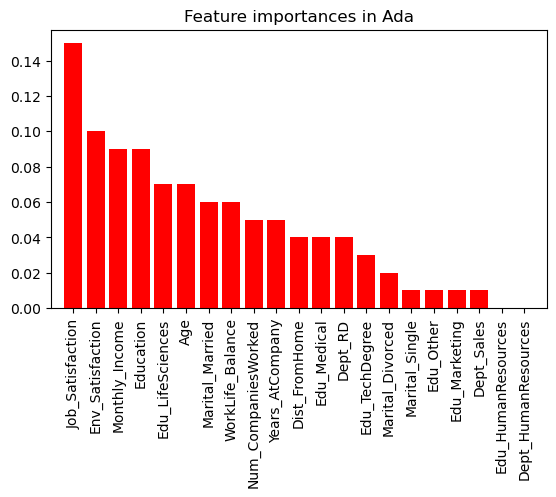

In [598]:
feature_names = X_new_df.columns

# 获取特征重要性
importances = ada.feature_importances_

# 对特征重要性排序
indices = np.argsort(importances)[::-1]

# 打印每个特征的重要性
print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

# 可视化特征重要性
plt.figure()
plt.title("Feature importances in Ada")
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.subplots_adjust(bottom=0.3)

# 保存图像为文件
plt.savefig('feature_importances_ada.png', bbox_inches='tight')

# 显示图像
plt.show()

Feature ranking:
1. Monthly_Income (0.11041858676621244)
2. Years_AtCompany (0.0987045711501202)
3. Age (0.09685794282696199)
4. Marital_Single (0.08971469895934295)
5. Dist_FromHome (0.08134075678161526)
6. Job_Satisfaction (0.06478536720430732)
7. Marital_Married (0.06023147711125545)
8. Env_Satisfaction (0.05955767679666908)
9. Num_CompaniesWorked (0.05928150943854905)
10. Education (0.04939379559246492)
11. WorkLife_Balance (0.04638551677234034)
12. Marital_Divorced (0.034086149253132365)
13. Edu_LifeSciences (0.03308848950371594)
14. Edu_Medical (0.029028177515368844)
15. Dept_Sales (0.023763759938764322)
16. Dept_RD (0.0214797154433871)
17. Edu_Marketing (0.013279491025646194)
18. Edu_TechDegree (0.011640234099746476)
19. Edu_Other (0.008479321453188733)
20. Dept_HumanResources (0.005600473798280679)
21. Edu_HumanResources (0.0028822885689303345)


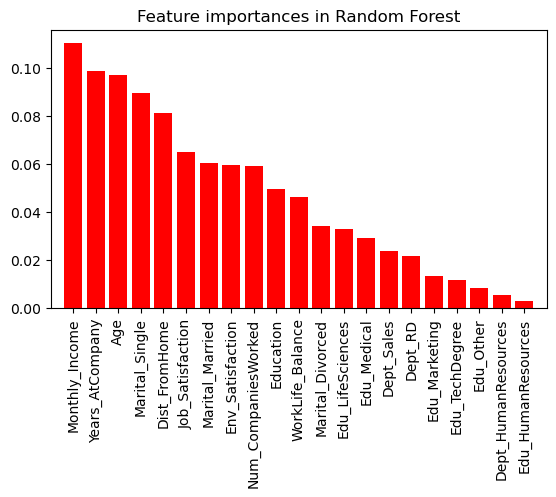

In [599]:
feature_names = X_new_df.columns

# 获取特征重要性
importances = rf.feature_importances_

# 对特征重要性排序
indices = np.argsort(importances)[::-1]

# 打印每个特征的重要性
print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

# 可视化特征重要性
plt.figure()
plt.title("Feature importances in Random Forest")
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.subplots_adjust(bottom=0.3)

# 保存图像为文件
plt.savefig('feature_importances_rf.png', bbox_inches='tight')

# 显示图像
plt.show()

In [600]:
Attrition = y

# 将 X_new_df 和 y 合并
df_final = pd.concat([X_new_df, Attrition], axis=1)

# 打印前几行查看结果
df_final.head()

,Dept_HumanResources,Dept_RD,Dept_Sales,Edu_HumanResources,Edu_LifeSciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_TechDegree,Marital_Divorced,...,Age,Dist_FromHome,Monthly_Income,Num_CompaniesWorked,WorkLife_Balance,Years_AtCompany,Education,Env_Satisfaction,Job_Satisfaction,Attrition
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.527737,-1.016554,0.025958,2.114938,-2.484776,0.061916,2,2,4,Yes
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.417036,-0.146262,-0.185146,-0.691479,0.339021,1.056934,1,3,2,No
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083087,-0.892227,-0.928776,1.313105,0.339021,-1.430613,2,4,3,Yes
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.361563,-0.767899,-0.728436,-0.691479,0.339021,0.559425,4,4,3,No
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.028537,-0.892227,-0.591696,2.515855,0.339021,-0.933103,1,1,2,No


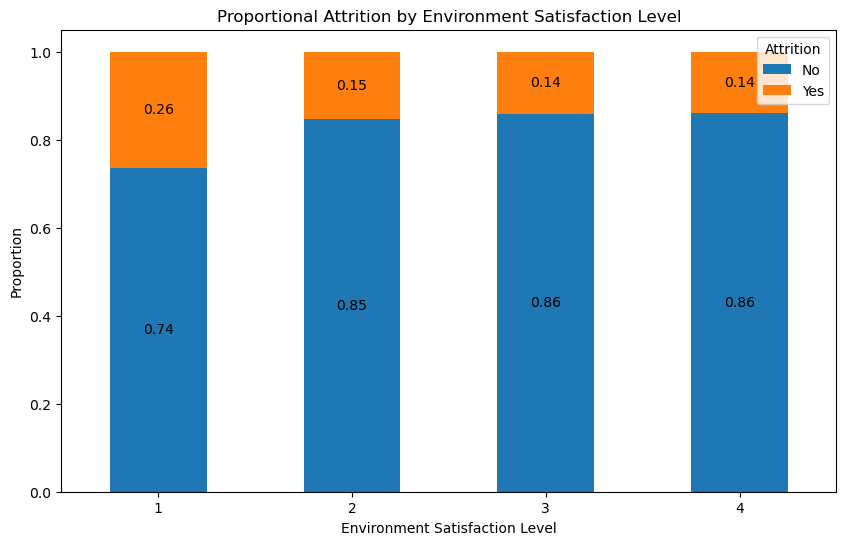

In [608]:
crosstab = pd.crosstab(df_final['Env_Satisfaction'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Environment Satisfaction Level')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Env_Satisfaction_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

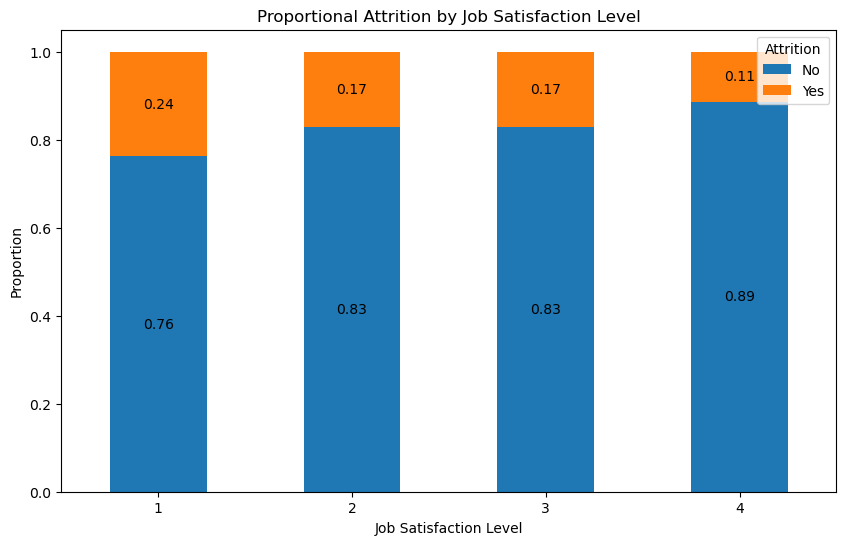

In [609]:
crosstab = pd.crosstab(df_final['Job_Satisfaction'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Job_Satisfaction_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

In [492]:
df4monthly = data_remove

In [493]:
df4monthly

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


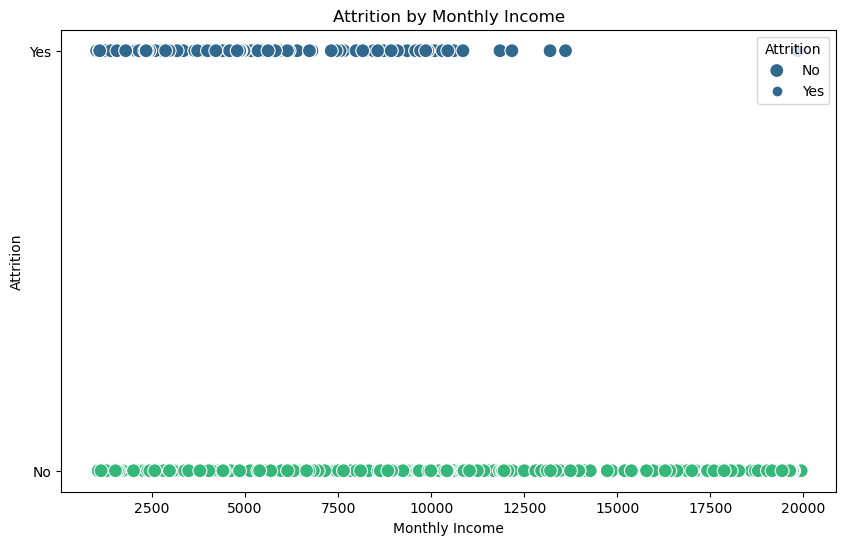

In [501]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='Attrition', data=data_remove, hue='Attrition', palette='viridis', s=100)
plt.title('Attrition by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Attrition')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.savefig('eda_Monthly_Income_Scatter.png', bbox_inches='tight')
plt.show()

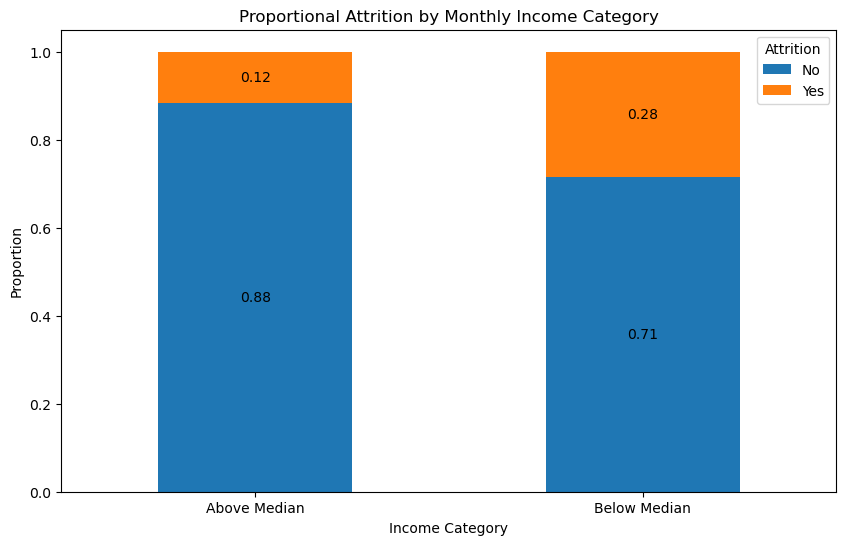

In [612]:
median_income_yes = df_final[df_final['Attrition'] == 'Yes']['Monthly_Income'].median()

# Create a new column categorizing Monthly Income based on the median value
df_final['Income_Category'] = df_final.apply(
    lambda x: 'Above Median' if x['Monthly_Income'] > median_income_yes else 'Below Median', axis=1
)

# Create a crosstab of 'Income_Category' and 'Attrition'
crosstab = pd.crosstab(df_final['Income_Category'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Monthly Income Category')
plt.xlabel('Income Category')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Income_Category_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

In [613]:
median_income_yes

-0.696146988681295

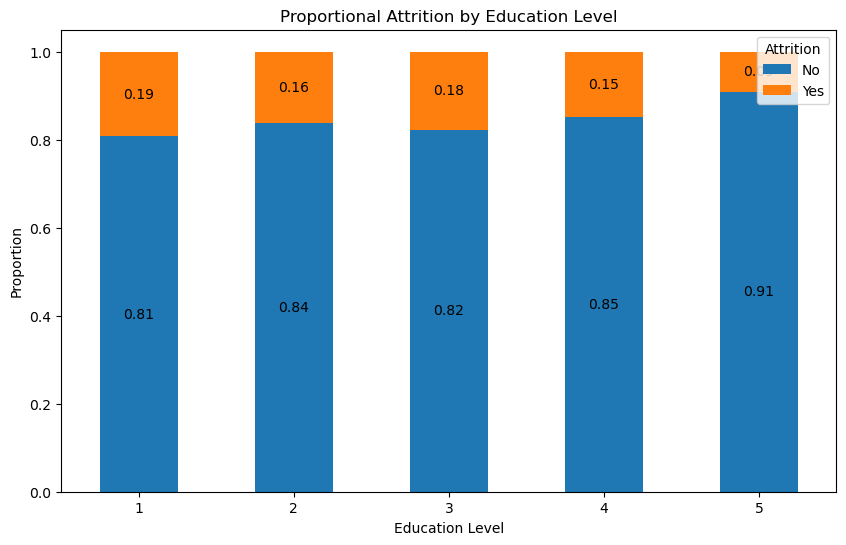

In [614]:
crosstab = pd.crosstab(df_final['Education'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Education_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

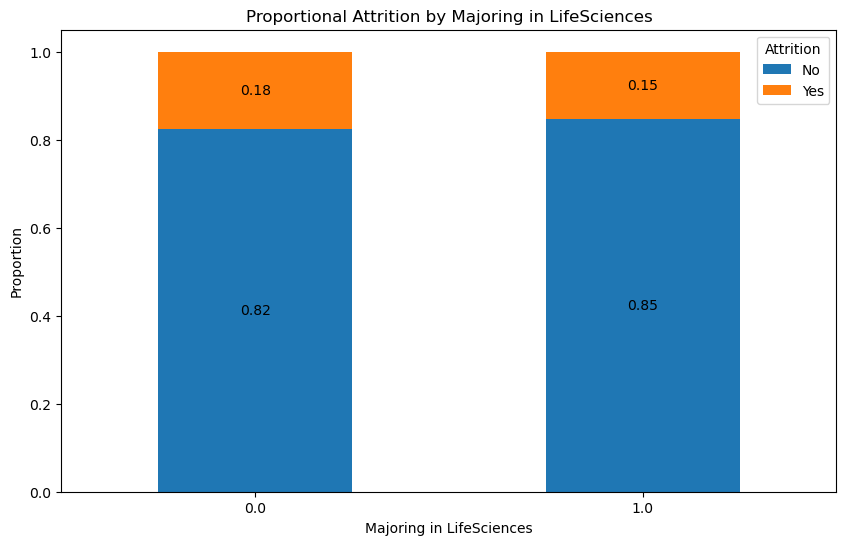

In [615]:
crosstab = pd.crosstab(df_final['Edu_LifeSciences'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Majoring in LifeSciences')
plt.xlabel('Majoring in LifeSciences')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('LifeSciences_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

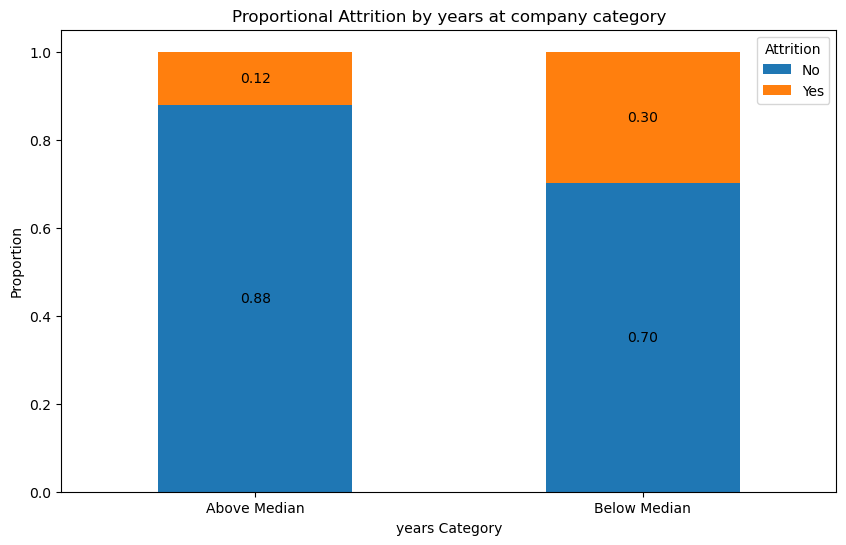

In [616]:
median_year_yes = df_final[df_final['Attrition'] == 'Yes']['Years_AtCompany'].median()

# Create a new column categorizing Monthly Income based on the median value
df_final['years_Category'] = df_final.apply(
    lambda x: 'Above Median' if x['Years_AtCompany'] > median_income_yes else 'Below Median', axis=1
)

# Create a crosstab of 'Income_Category' and 'Attrition'
crosstab = pd.crosstab(df_final['years_Category'], df_final['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by years at company category')
plt.xlabel('years Category')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('years_Category_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

/var/folders/8k/8b34qvv11dv3t5ks_4691z4h0000gn/T/ipykernel_15138/3287492982.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remove['Age_Category'] = data_remove['Age'].apply(age_category)


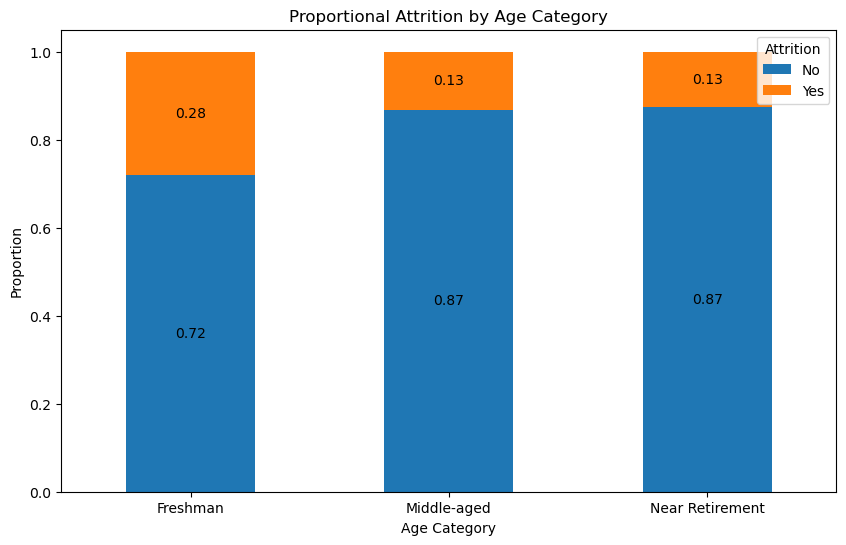

In [625]:
def age_category(age):
    if age < 30:
        return 'Freshman'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Near Retirement'

# Create a new column categorizing Age based on the defined thresholds
data_remove['Age_Category'] = data_remove['Age'].apply(age_category)

# Create a crosstab of 'Age_Category' and 'Attrition'
crosstab = pd.crosstab(data_remove['Age_Category'], data_remove['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Age_Category_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

In [626]:
data_remove.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age_Category
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,Middle-aged
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,Middle-aged
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,Middle-aged
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,Middle-aged
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,Freshman


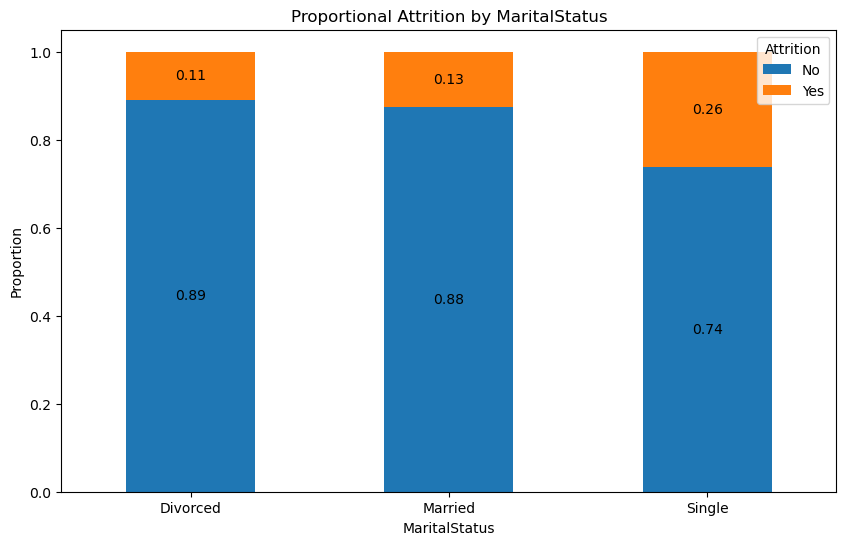

In [627]:
crosstab = pd.crosstab(data_remove['MaritalStatus'], data_remove['Attrition'], normalize='index')

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('MaritalStatus_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

/var/folders/8k/8b34qvv11dv3t5ks_4691z4h0000gn/T/ipykernel_15138/166502237.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_remove['Distance_Category'] = data_remove['DistanceFromHome'].apply(distance_category)


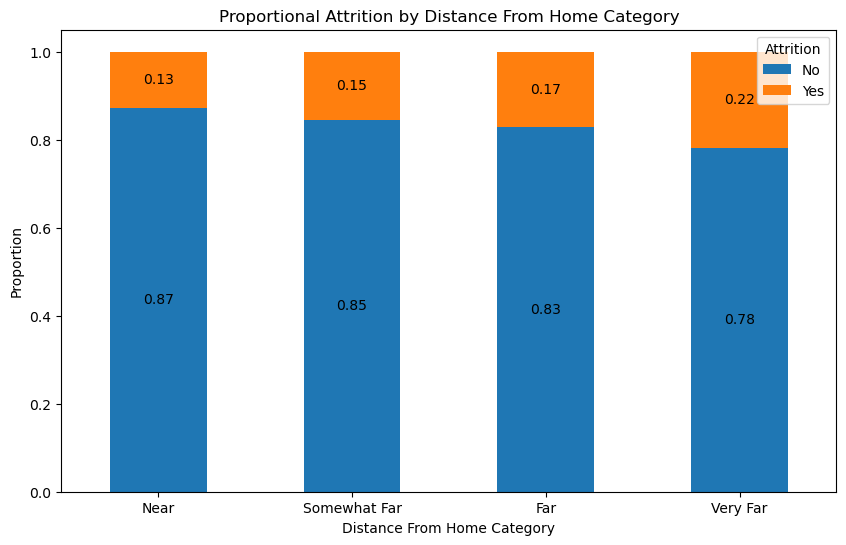

In [631]:
quartiles = data_remove['DistanceFromHome'].quantile([0.25, 0.5, 0.75])

def distance_category(distance):
    if distance <= quartiles[0.25]:
        return 'Near'
    elif distance <= quartiles[0.5]:
        return 'Somewhat Far'
    elif distance <= quartiles[0.75]:
        return 'Far'
    else:
        return 'Very Far'

# Create a new column categorizing DistanceFromHome based on the quartiles
data_remove['Distance_Category'] = data_remove['DistanceFromHome'].apply(distance_category)

# Create a crosstab of 'Distance_Category' and 'Attrition' with specified order
crosstab = pd.crosstab(data_remove['Distance_Category'], data_remove['Attrition'], normalize='index')
crosstab = crosstab.reindex(['Near', 'Somewhat Far', 'Far', 'Very Far'])

# Plot the proportional bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['C0', 'C1'])
plt.title('Proportional Attrition by Distance From Home Category')
plt.xlabel('Distance From Home Category')
plt.ylabel('Proportion')
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Annotate the bars with proportion numbers
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

plt.savefig('Distance_Category_Proportional_Attrition.png', bbox_inches='tight')
plt.show()

In [632]:
quartiles

0.25     2.0
0.50     7.0
0.75    14.0
Name: DistanceFromHome, dtype: float64

In [624]:
df_final['Age']

0       0.527737
1       1.417036
2       0.083087
3      -0.361563
4      -1.028537
          ...   
1465   -0.028075
1466    0.305412
1467   -1.028537
1468    1.417036
1469   -0.250400
Name: Age, Length: 1366, dtype: float64